# Project: Investigate a TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. We'll analyse what factors does a movie budget infuence and what factors affect revenue generated by movies. We'll also observe trends across various factors over the years

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading data from csv

In [2]:
df = pd.read_csv('tmdb-movies.csv')

### Exploring General Properties

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The keywords column was not visible in the output of head method. So exploring the contents of keywords column

In [5]:
df['keywords'][:5]

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

### Data Cleaning

Droping the columns that are not required for analysis

In [6]:
df.drop(['homepage','id', 'imdb_id', 'production_companies','release_date','tagline','overview', 'keywords', 'cast','budget_adj', 'revenue_adj'], axis =1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


In [7]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


Converting budget/revenue columns to type int

In [8]:
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


Checking the count of null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


In [10]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

We can drop rows with null values in director and geners just before analysing them so as to not lose much data

In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


The max value of 900 in runtime column seems to be an outlier

In [12]:
df.query('runtime == 900')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,14,9.2,2011


A quick web search revelead that it's more of a TV show than a movie. Also exploring movies with runtime 0

In [13]:
df.query('runtime == 0')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
92,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015
334,0.357654,0,0,Ronaldo,Anthony Wonke,0,Documentary,80,6.5,2015
410,0.097514,0,0,Anarchy Parlor,Kenny Gage|Devon Downs,0,Horror,15,5.6,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,52,5.0,2015
486,0.176744,0,0,If There Be Thorns,Nancy Savoca,0,TV Movie|Drama,11,5.4,2015
595,0.028725,0,0,Deep Dark,Michael Medaglia,0,Horror,11,4.6,2015
616,0.026797,0,0,The Outfield,Michael Goldfine,0,Drama|Comedy,20,6.6,2015
1241,0.135376,0,0,Dance-Off,NaN,0,Romance|Music|Comedy,18,5.7,2014
1289,0.037459,3250000,0,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,16,3.4,2014
1293,0.036904,0,0,Tim Maia,Mauro Lima,0,Documentary|Drama|Music,14,6.0,2014


In [14]:
df.query('runtime == 0').count()

popularity        31
budget            31
revenue           31
original_title    31
director          29
runtime           31
genres            30
vote_count        31
vote_average      31
release_year      31
dtype: int64

Most of the movie entries with a runtime 0 also have zeroes in revenue/budget columns and the row count seems to be relatively small. So dropping them.

In [15]:
df.drop(df[df.runtime == 900].index, inplace=True)
df.drop(df[df.runtime == 0].index, inplace=True)
df.drop_duplicates(inplace=True)

In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10833.000000,1.083300e+04,1.083300e+04,10833.000000,10833.000000,10833.000000,10833.000000
mean,0.647821,1.466645e+07,3.994454e+07,102.290224,217.980892,5.976045,2001.294378
std,1.001232,3.095010e+07,1.171609e+08,29.985665,576.394206,0.934577,12.819961
min,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.208611,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.384763,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.715451,1.500000e+07,2.418578e+07,112.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.900000,2015.000000


The min, 25th and 50th percentile of revenue and budget columns seems to be zero. So checking the no of rows before dropping them

In [17]:
df[(df.budget == 0) & (df.revenue == 0)].count()

popularity        4672
budget            4672
revenue           4672
original_title    4672
director          4634
runtime           4672
genres            4651
vote_count        4672
vote_average      4672
release_year      4672
dtype: int64

The counts seem to be relatively higher so dropping them and storing it as a seperate dataframe for budget/revenue analysis so that we dont lose much data for other analysis

In [18]:
df_revenue = df.drop(df[(df.budget == 0) & (df.revenue == 0)].index)

In [19]:
df_revenue.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,6161.000000,6.161000e+03,6.161000e+03,6161.000000,6161.000000,6161.000000,6161.000000
mean,0.909733,2.578828e+07,7.023523e+07,106.505762,356.102094,6.039831,2000.981334
std,1.241070,3.738404e+07,1.483568e+08,23.041852,733.362248,0.871959,11.918915
min,0.001117,0.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000
25%,0.322320,1.700000e+06,1.200000e+05,93.000000,31.000000,5.500000,1994.000000
50%,0.570564,1.200000e+07,1.658954e+07,103.000000,96.000000,6.100000,2004.000000
75%,1.050687,3.300000e+07,7.148504e+07,116.000000,324.000000,6.600000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000


The minimum in budget and revenue still seem to be zero so checking the count

In [20]:
df_revenue[(df_revenue.budget == 0) | (df_revenue.revenue == 0)].count()

popularity        2307
budget            2307
revenue           2307
original_title    2307
director          2304
runtime           2307
genres            2306
vote_count        2307
vote_average      2307
release_year      2307
dtype: int64

The count seems high and the 25th %ile has values unlike earlier, so lets not drop these again so as to not lose much data

In [21]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6161 entries, 0 to 10865
Data columns (total 10 columns):
popularity        6161 non-null float64
budget            6161 non-null int64
revenue           6161 non-null int64
original_title    6161 non-null object
director          6157 non-null object
runtime           6161 non-null int64
genres            6160 non-null object
vote_count        6161 non-null int64
vote_average      6161 non-null float64
release_year      6161 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 529.5+ KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10833 non-null float64
budget            10833 non-null int64
revenue           10833 non-null int64
original_title    10833 non-null object
director          10791 non-null object
runtime           10833 non-null int64
genres            10811 non-null object
vote_count        10833 non-null int64
vote_average      10833 non-null float64
release_year      10833 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


#### Exploring the freqency of movies released across years

In [23]:
def plot_label(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()


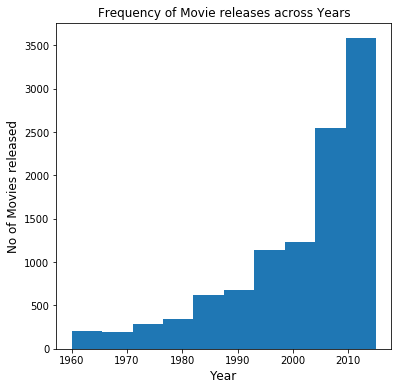

In [24]:
df['release_year'].plot(kind='hist', figsize=(6,6))
plot_label('Frequency of Movie releases across Years','Year','No of Movies released' )

We can infer from the above figure that the dataset contains relatively more movies that were released after ~2005

#### Exploring the Average ratings received by movies

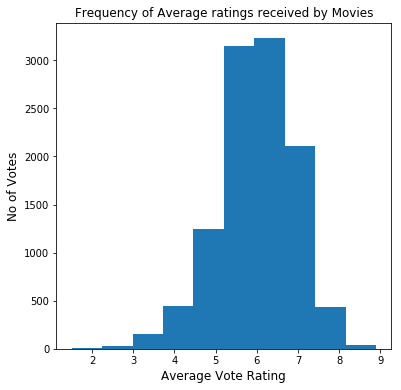

In [25]:
df['vote_average'].plot(kind='hist', figsize=(6,6))
plot_label('Frequency of Average ratings received by Movies','Average Vote Rating','No of Votes')

The above figure shows that Average ratings are normally distributed

<a id='eda'></a>
## Exploratory Data Analysis


df_revenue will be used for budget/revenue analysis and df will be used for other analysis so that we don't miss much data for non budget/revenue analysis

Defining a function to plot trend over the years. 

In [26]:
def trend_plot(df1, column_name, title, xlabel, ylabel):
    df1.groupby('release_year')[column_name].mean().plot()
    plot_label(title, xlabel, ylabel)
    

### Is there a trend of movies being made with increasing budget over the years?

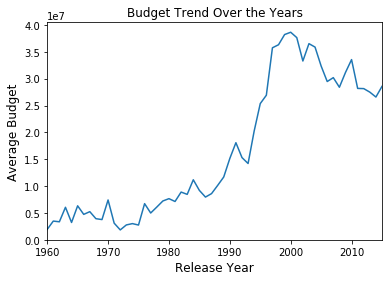

In [27]:
trend_plot(df_revenue, 'budget', 'Budget Trend Over the Years', 'Release Year', 'Average Budget')

Looks like the Average Budget has gradually reduced from the year 2000 onwards

### Is there a trend of movies generating increasing revenue over the years?

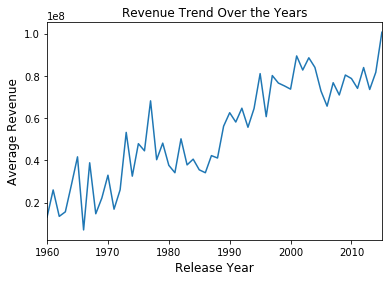

In [28]:
trend_plot(df_revenue, 'revenue', 'Revenue Trend Over the Years', 'Release Year', 'Average Revenue')

Average Revenue though volatile is showing an upward trend over the years

### Is there a trend of movies garnering more votes over the years?

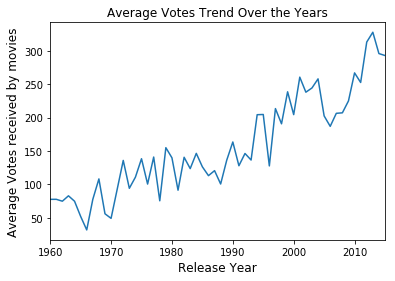

In [29]:
trend_plot(df, 'vote_count', 'Average Votes Trend Over the Years', 'Release Year', 'Average Votes received by movies')

It appeares like movies have received more votes over the years 

### Is there a trend of movies garnering more popularity over the years?

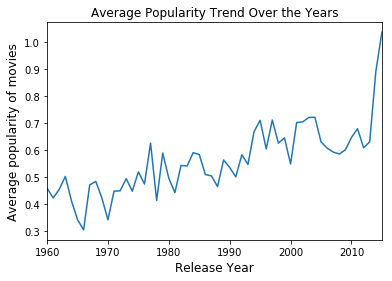

In [30]:
trend_plot(df, 'popularity', 'Average Popularity Trend Over the Years', 'Release Year', 'Average popularity of movies')

There is a gradual increase of populality over the years and a steep increasse after 2010

### Is there a trend of better movies being made over the years in terms of average vote rating ?

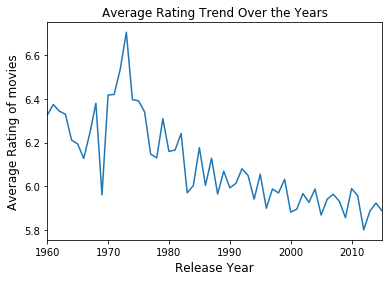

In [31]:
trend_plot(df, 'vote_average', 'Average Rating Trend Over the Years', 'Release Year', 'Average Rating of movies')

It appreas like the average rating of movies have decreased over the years

### Does higher budget movies generate more revenue?

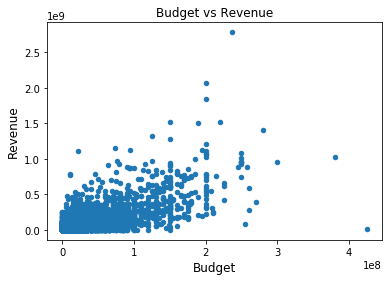

In [32]:
df_revenue.plot(kind='scatter', x='budget', y='revenue')
plot_label('Budget vs Revenue', 'Budget', 'Revenue')

There is no clear inference that can be observed

### Are higher budget movies more popular?

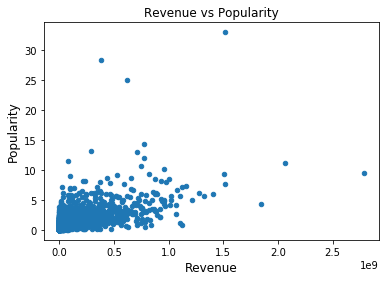

In [33]:
df_revenue.plot(kind='scatter', x='revenue', y='popularity')
plot_label('Revenue vs Popularity', 'Revenue', 'Popularity')

There is no clear inference that can be observed

Since scatter plotting the revenue/budget analysis does not offer a clear picture, we are dividing budget/revenue into categories of Low, Medium, High and Very High to analyse what factors influence or get influenced by budget/revenue

In [34]:
def split_to_categories(df, column):
    bin_edges = [df[column].min(),df[column].quantile(0.25),df[column].quantile(0.5),df[column].quantile(0.75),df[column].max()]
    bin_names = ['Low','Medium','Moderately_High','High']
    column_name = column + '_category'
    df[column_name] = pd.cut(df[column], bin_edges, labels=bin_names)
    return df
    

In [35]:
split_to_categories(df_revenue, 'budget')
split_to_categories(df_revenue, 'revenue')

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_category,revenue_category
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,High,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,High,High
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,High,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,High,High
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,High,High
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,High,High
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,High,High
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,High,High
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,High,High
9,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015,High,High


Lets check how many movies belong to the spilt categories of budget and revenue

In [36]:
df_revenue['budget_category'].value_counts()

Medium             1571
High               1539
Moderately_High    1508
Low                 548
Name: budget_category, dtype: int64

In [37]:
df_revenue['revenue_category'].value_counts()

High               1540
Moderately_High    1540
Medium             1540
Low                 229
Name: revenue_category, dtype: int64

Since the dataset contains majority of movies that were released after 2005, considering only those for budget/revenue based analysis

In [38]:
def plot_bar(df, category, column_name, title, xlabel, ylabel):
    df[df['release_year'] >= 2005].groupby(category)[column_name].mean().plot(kind='bar', rot=30)
    plot_label(title, xlabel, ylabel)
    plt.show()

### Are higher budget movies generally more popular?

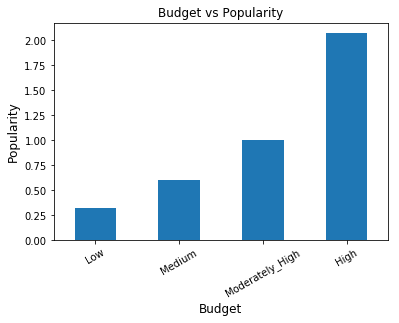

In [39]:
plot_bar(df_revenue, 'budget_category','popularity', 'Budget vs Popularity', 'Budget', 'Popularity' )

Looks like higher budget movies garner more popularity

### Do Popular movies on average generate more revenue?

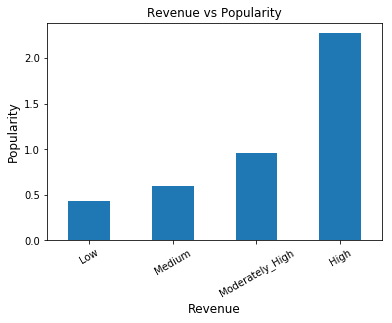

In [40]:
plot_bar(df_revenue, 'revenue_category','popularity', 'Revenue vs Popularity', 'Revenue', 'Popularity')

Popular movies do bring in high revenue. And there is a steep increase in popularity of high budget/revenue movies when compared to other budget/revenue levels

### Do high revenue generating movies on average generally receive better rating?

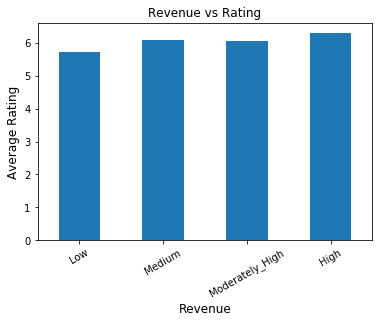

In [41]:
plot_bar(df_revenue, 'revenue_category', 'vote_average', 'Revenue vs Rating' , 'Revenue', 'Average Rating')

There seems to be no clear correlation between revenue generated by movies and their rating

### Do high budget movies on average get more no of votes?

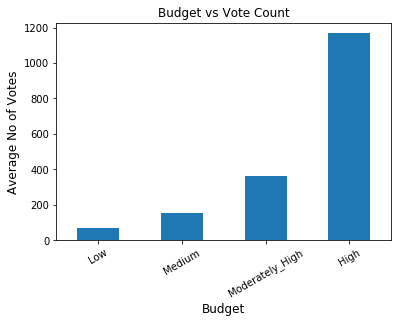

In [42]:
plot_bar(df_revenue, 'budget_category', 'vote_count', 'Budget vs Vote Count', 'Budget', 'Average No of Votes' )

Looks like more people get online to vote for higher budget movies but we cannot actually consider the vote count of Low budget movies since the movie count is relatively less than other budget categories

### Directors who directed more no of high revenue generating movies

In [43]:
df_revenue[df_revenue['revenue_category'] == 'High'].director.value_counts().head(25)

Steven Spielberg      25
Ron Howard            13
Robert Zemeckis       13
Clint Eastwood        12
Tim Burton            12
Ridley Scott          11
Michael Bay           11
Tony Scott            10
David Fincher         10
Raja Gosnell           9
Peter Jackson          8
M. Night Shyamalan     8
Ivan Reitman           8
Steven Soderbergh      8
Roland Emmerich        8
Joel Schumacher        8
Brett Ratner           8
Martin Scorsese        8
Gore Verbinski         8
Chris Columbus         8
Paul W.S. Anderson     8
Shawn Levy             7
Martin Campbell        7
Frank Coraci           7
Christopher Nolan      7
Name: director, dtype: int64

Looks like Steven Spielberg stood out with 25 high generating movies

### Top 25 revenue generating geners of movies

In [44]:
df_revenue[df_revenue['revenue_category'] == 'High'].genres.value_counts().head(25)

Comedy                                       102
Drama                                         68
Comedy|Romance                                46
Drama|Romance                                 28
Comedy|Drama|Romance                          24
Action|Thriller                               21
Comedy|Drama                                  20
Adventure|Action|Thriller                     19
Comedy|Family                                 18
Horror|Thriller                               16
Animation|Family                              15
Animation|Comedy|Family                       15
Horror                                        14
Action|Adventure|Thriller                     12
Comedy|Crime                                  11
Action|Comedy                                 11
Crime|Drama|Thriller                          11
Adventure|Action|Thriller|Science Fiction     11
Action|Crime|Thriller                         11
Action|Adventure|Science Fiction              10
Action|Drama|Thrille

Comedy and Drama seems to have the majority, however we also have to consider the multi genre movies

Lets look at the geners of Moderately High movies

In [45]:
df_revenue[df_revenue['revenue_category'] == 'Moderately_High'].genres.value_counts().head(25)

Comedy                         118
Drama                           95
Comedy|Drama|Romance            54
Drama|Romance                   50
Comedy|Romance                  46
Horror|Thriller                 44
Comedy|Drama                    39
Horror                          24
Drama|Thriller                  21
Comedy|Family                   19
Action|Crime|Thriller           18
Crime|Drama                     16
Crime|Drama|Thriller            16
Drama|History                   15
Thriller                        14
Horror|Mystery|Thriller         14
Drama|Crime                     13
Drama|Comedy                    13
Action|Crime|Drama|Thriller     12
Drama|Comedy|Romance            12
Action|Thriller                 11
Drama|Music                     11
Action|Adventure|Comedy         11
Action|Comedy|Crime             11
Thriller|Crime|Drama             9
Name: genres, dtype: int64

Comedy and drama seems to be the majority even here

In [46]:
df_revenue.count()

popularity          6161
budget              6161
revenue             6161
original_title      6161
director            6157
runtime             6161
genres              6160
vote_count          6161
vote_average        6161
release_year        6161
budget_category     5166
revenue_category    4849
dtype: int64

Analysing genres by considering multiple genres movies

In [47]:
def plot_genres(df1, category):
    df = df1[df1.revenue_category == category]
    Action = df[df['genres'].str.match('Action')].original_title.count()
    Adventure = df[df['genres'].str.match('Adventure')].original_title.count()
    Comedy = df[df['genres'].str.match('Comedy')].original_title.count()
    Drama = df[df['genres'].str.match('Drama')].original_title.count()
    Romance = df[df['genres'].str.match('Romance')].original_title.count()
    Crime = df[df['genres'].str.match('Crime')].original_title.count()
    Thriller = df[df['genres'].str.match('Thriller')].original_title.count()
    Horror = df[df['genres'].str.match('Horror')].original_title.count()
    Music = df[df['genres'].str.match('Music')].original_title.count()
    Family = df[df['genres'].str.match('Family')].original_title.count()
    label = ['Adventure', 'Action', 'Comedy', 'Drama', 'Romance', 'Crime','Thriller', 'Horror', 'Music','Family']

    no_movies = [Adventure, Action, Comedy, Drama, Romance, Crime,Thriller, Horror, Music,Family]
    index = np.arange(len(label))
    plt.bar(index, no_movies)
    plt.rcParams["figure.figsize"] = [6, 6]
    plt.xticks(index, label, rotation=30)
    title = 'Genre composition of ' + category + ' Revenue Generating Movies'
    plot_label(title, 'Genres', 'No of Movies')

#### Genres of High Revenue generating movies

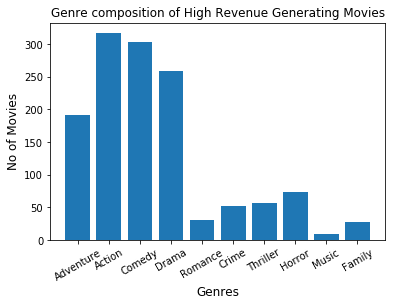

In [48]:
plot_genres(df_revenue, 'High')

Action seems to be one of the genre of High revenue generating movies followed by Comedy and Drama

#### Genres of Moderately High Revenue generating movies

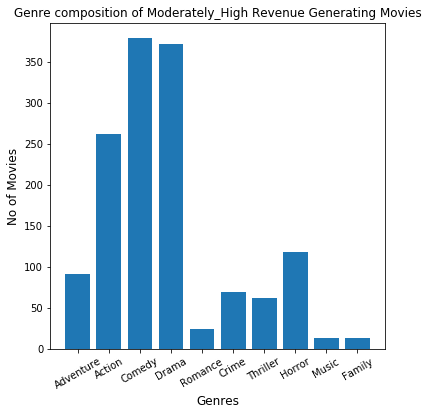

In [49]:
plot_genres(df_revenue, 'Moderately_High')

Comedy and Drama have more no of movies in Moderately High Revenue generating category

#### Genres of Medium Revenue generating movies

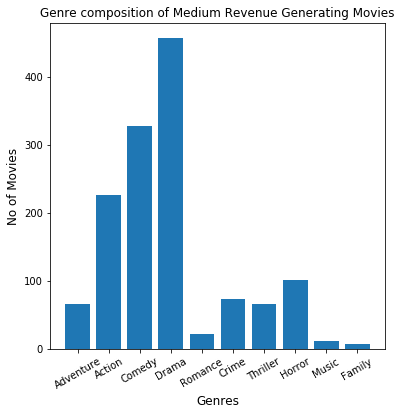

In [50]:
plot_genres(df_revenue, 'Medium')

Drama seems to be the majority here followed by Comedy and Action

Overall there seem to be more no of Drama and Comedy movies in Medium to High Revenue generating categories

### Analysing Genre Trend over the years

Since majority of the movies in the dataset are released after 2000, lets consider only them for trend analysis

In [51]:
df1 = df[df.release_year >= 2000] 

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7135 entries, 0 to 8887
Data columns (total 10 columns):
popularity        7135 non-null float64
budget            7135 non-null int64
revenue           7135 non-null int64
original_title    7135 non-null object
director          7098 non-null object
runtime           7135 non-null int64
genres            7118 non-null object
vote_count        7135 non-null int64
vote_average      7135 non-null float64
release_year      7135 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 613.2+ KB


In [53]:
drop_index = df1[df1['genres'].isnull()].index
df2 = df1.drop(drop_index, inplace=False)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7118 entries, 0 to 8887
Data columns (total 10 columns):
popularity        7118 non-null float64
budget            7118 non-null int64
revenue           7118 non-null int64
original_title    7118 non-null object
director          7083 non-null object
runtime           7118 non-null int64
genres            7118 non-null object
vote_count        7118 non-null int64
vote_average      7118 non-null float64
release_year      7118 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 611.7+ KB


In [55]:
df2_Action = df2[df2['genres'].str.match('Action')].groupby('release_year')['original_title'].count()
df2_Adventure = df2[df2['genres'].str.match('Adventure')].groupby('release_year')['original_title'].count()
df2_Comedy = df2[df2['genres'].str.match('Comedy')].groupby('release_year')['original_title'].count()
df2_Drama = df2[df2['genres'].str.match('Drama')].groupby('release_year')['original_title'].count()

In [56]:
df2_Adventure.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='release_year')

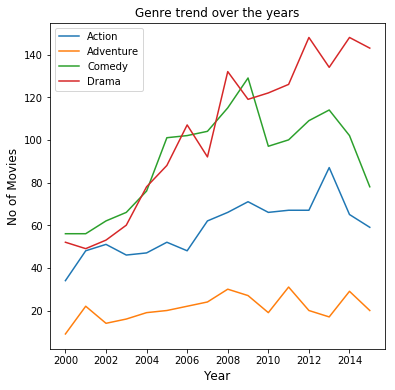

In [57]:
plt.plot(df2_Action.index, df2_Action, label='Action')
plt.plot(df2_Adventure.index, df2_Adventure, label='Adventure')
plt.plot(df2_Comedy.index, df2_Comedy, label='Comedy')
plt.plot(df2_Drama.index, df2_Drama, label='Drama')
plt.legend(loc="upper left")
plot_label('Genre trend over the years', 'Year', 'No of Movies')

An increasing/steep trend of making Drama movies can be inferred from the above graph. There was also an increasing trend of Comdedy movies till the year 2008. 
Also there seems to be a slow increase of number of Action movies over the years 

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>On an average,Movies have generated increasing revenue over the years</li>
    <li>There has been an increase in people voting for movies over the years</li>
    <li>Movies have become more popular over the years</li>
    <li>Higher budget movies are generally more popular and get more number of votes</li>
    <li>Popular movies generally generate more revenue</li> 
    <li>Action, Comedy and Drama movies seem to generate more revenue than other genres</li>
    <li>There has been a steep increase of Drama movies over the years</li>
    <li>Comedy movies were in trend till 2008 and the trend has been in decline ever since</li>
</ul>

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0